<a href="https://colab.research.google.com/github/DracyanF/TinyVGG-model/blob/main/TinyVGGModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision (using torchvision)**

- torchvision.datasets - Get datasets and loading functions
- torchvision.models- get pretrained computer vision models that we can leverage for our problems
- torchvision.transforms- functions for manipulating vision data to be suitable to use with ML models

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Dataset- FASHION MNIST

Setup Training data

In [ ]:
train_data=datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor(),target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor(), target_transform=None
)



100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 152kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.84MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.5MB/s]


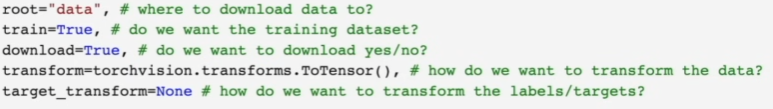

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_name= train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

# **Visualizing data**

image shape: torch.Size([1, 28, 28])


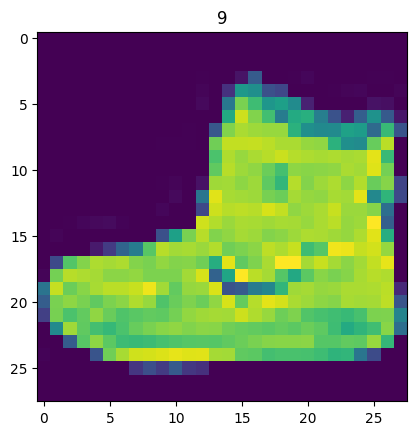

In [ ]:
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);


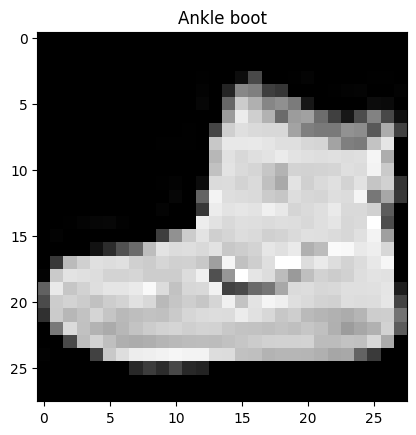

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label]);

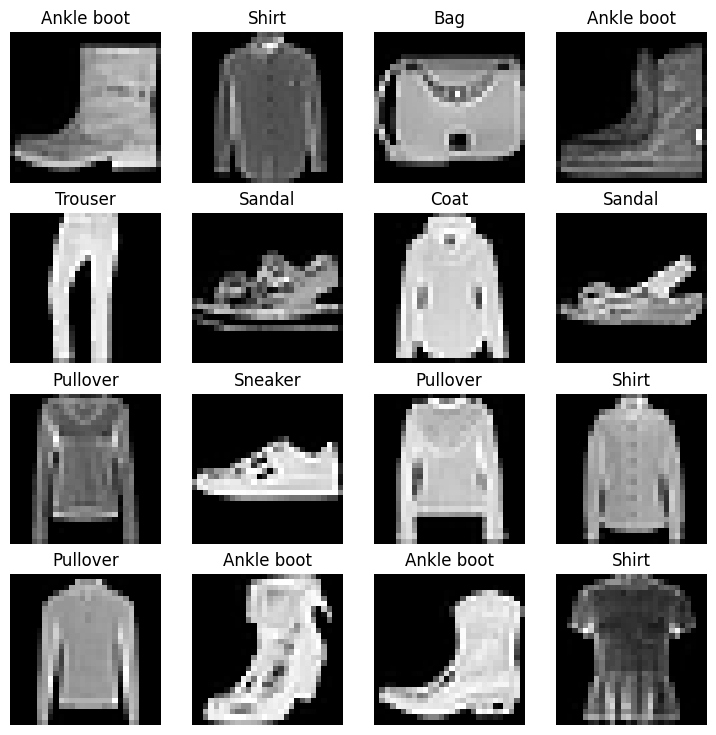

In [ ]:
# Plot more images

torch.manual_seed(42)
fig= plt.figure(figsize=(9,9))
rows, cols=4,4
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0,len(train_data), size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_name[label])
  plt.axis(False);

**Prepare Dataloader**
- turn dataset into python iterable.
- turn our data into batches (mini-batches)

In [ ]:
from torch.utils.data import DataLoader

# Setup the batchsize Hyperparameter
BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


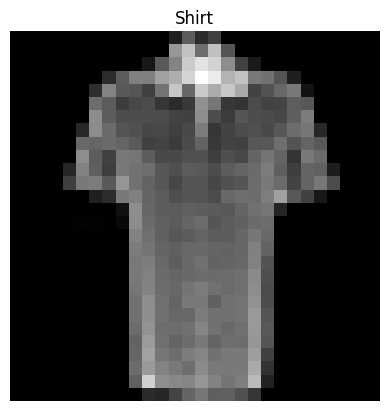

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# **Base Model- Model 0**

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Create a Flatten layer
flatten_model=nn.Flatten()

# get a single sample
x=train_features_batch[0]

# Flatten the sample
output=flatten_model(x)

print(f"Shape before flattening: {x.shape}\nShape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0= FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10,
    output_shape=len(class_name)
)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

**Setup loss, optimizer, evaluation metrics**

In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 14.9 MB/s eta 0:00:00


In [ ]:
import torchmetrics
acc_fn=torchmetrics.Accuracy('multiclass', num_classes= len(train_data.classes)).to(device)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_0.parameters(),lr=0.1)

time our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  '''
  Prints difference between start and end time
  '''
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.8967000001075576e-05

# Creating a training loop on batches of data
- optimizer will update a model's parameters once per batch rather than once per epoch

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate training loss
3. loop through testing batches, perform testing steps, calculate test loss


In [ ]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

# keeping epochs small to run model faster
epochs= 3

# Train loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  train_loss=0
  for batch, (X,y) in enumerate (train_dataloader):
    model_0.train()

    # Forward pass
    y_pred=model_0(X)

   # calculate loss
    loss=loss_fn(y_pred, y)
    train_loss +=loss

   # Optimizer Zero Grad
    optimizer.zero_grad()

   # Loss backward
    loss.backward()

    # Optimizer sTEP
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

# Divide total train loss by length of train dataloader
train_loss /=len(train_dataloader)

### Testing loop

test_loss, test_accuracy=0,0
model_0.eval()
with torch.inference_mode():
  for X_test,y_test in test_dataloader:

   # Forward pass
   y_test_pred=model_0(X_test)

   # Test loss
   test_loss += loss_fn(y_test_pred, y_test)

   # accuracy
   test_accuracy += acc_fn(y_test,y_test_pred.argmax(dim=1))

  # Calculate the test loss average per batch
  test_loss /=len(test_dataloader)

  # Calculate the test acc per batch
  test_accuracy/= len(test_dataloader)

print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test accuracy: {test_accuracy: .4f}")

# Calculate training time
train_time_end_on_cpu= timer()

total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4532 | Test Loss: 0.5109, Test accuracy:  0.8238
Train time on cpu: 51.000 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device): # Add device parameter
  loss,acc=0,0

  model_0.to(device)

  model.eval()
  with torch.inference_mode():
     for X,y in data_loader:
       X,y = X.to(device), y.to(device) # Move data to target device
       y_pred=model(X)

       loss+=loss_fn(y_pred,y)
       acc+=acc_fn(y, y_pred.argmax(dim=1))
     loss /=len(data_loader)
     acc /=len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc.item()}
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=acc_fn,
                           device=device) # Pass device to eval_model
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108762979507446,
 'model_acc': 0.8237819671630859}

# **Building a better Non-Linear Model**

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,output_shape:int, hidden_units:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1= FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_name)).to(device)

next(model_1.parameters()).device

device(type='cpu')

Loss function, optimizer and evaluation metrics

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)
acc_fn=torchmetrics.Accuracy('multiclass',num_classes=len(train_data.classes)).to(device)

Functionzing training and evaluation/testing loops
1. train_step()
2. test_step()

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss, train_acc=0,0

  model.train()

  for batch, (X,y) in enumerate (data_loader):
    X,y = X.to(device), y.to(device)

    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss += loss

    accuracy=accuracy_fn(y,y_pred.argmax(dim=1))
    train_acc +=accuracy

    optimizer.zero_grad()

    loss.backward()

    optimizer.step() # Corrected: This line was optimizer.zero_grad() and now correctly calls step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")

In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  test_loss, test_acc=0,0

  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test,y_test=X_test.to(device), y_test.to(device)

      y_test_pred=model(X_test)

      loss=loss_fn(y_test_pred,y_test)
      test_loss +=loss

      accuracy=accuracy_fn(y_test,y_test_pred.argmax(dim=1))
      test_acc +=accuracy

    # Calculate the test loss average per batch (moved outside the loop)
    test_loss /= len(data_loader)

    # Calculate the test acc per batch (moved outside the loop)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test acc: {test_acc.item():.2f}")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=acc_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=acc_fn,
            device=device)
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
Train Loss: 1.09199 | Train acc: 0.61
Test Loss: 0.95636 | Test acc: 0.65
Epoch:1
------
Train Loss: 0.78101 | Train acc: 0.72
Test Loss: 0.72227 | Test acc: 0.74
Epoch:2
------
Train Loss: 0.67027 | Train acc: 0.76
Test Loss: 0.68500 | Test acc: 0.75
Train time on cpu: 54.345 seconds


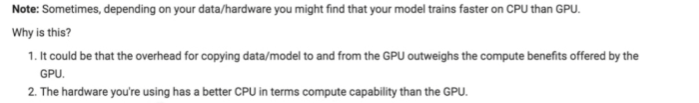

In [ ]:
# Get Model 1 result dictionary
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=acc_fn,
                           device=device) # Pass device to eval_model
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 0.7501996755599976}

# **Till now we worked only with Neural Networks, now we'll work with CNN (Convolutional Neural Networks)**

# **ModelV2**
replicating the TinyVGG model

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x


In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(train_data.classes)).to(device)


In [ ]:
image.to(device)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

we haven't trained our model yet this is random output we just want to make sure that our output matches to the number of classes.

In [ ]:
model_2(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

# **Setting up Loss fn and optimizer**

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1) # Re-initialize optimizer with new model_2 parameters
acc_fn=torchmetrics.Accuracy('multiclass',num_classes=len(train_data.classes)).to(device) # Move acc_fn to the correct device

# **Train Model 2**

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_model_2=timer()

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=acc_fn,
             device=device) # Explicitly pass device
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=acc_fn,
            device=device) # Explicitly pass device

train_time_end_model_2=timer()

total_time_taken_model_2=print_train_time(train_time_start_model_2,train_time_end_model_2,device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0
------
Train Loss: 0.28012 | Train acc: 0.90
Test Loss: 0.30096 | Test acc: 0.89
Epoch:1
------
Train Loss: 0.27098 | Train acc: 0.90
Test Loss: 0.29877 | Test acc: 0.89
Epoch:2
------
Train Loss: 0.26506 | Train acc: 0.90
Test Loss: 0.28382 | Test acc: 0.90
Epoch:3
------
Train Loss: 0.25696 | Train acc: 0.91
Test Loss: 0.28462 | Test acc: 0.89
Epoch:4
------
Train Loss: 0.25384 | Train acc: 0.91
Test Loss: 0.29161 | Test acc: 0.90
Train time on cpu: 309.656 seconds


In [ ]:
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=acc_fn,
                           device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2916148006916046,
 'model_acc': 0.9007588028907776}

In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.510876,0.823782
1,FashionMNISTModelV1,0.685001,0.750200
2,FashionMNISTModelV2,0.291615,0.900759


In [ ]:
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_time_taken_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.510876,0.823782,50.999713
1,FashionMNISTModelV1,0.685001,0.750200,54.345390
2,FashionMNISTModelV2,0.291615,0.900759,309.656315


# **Visuzlize our model performance**

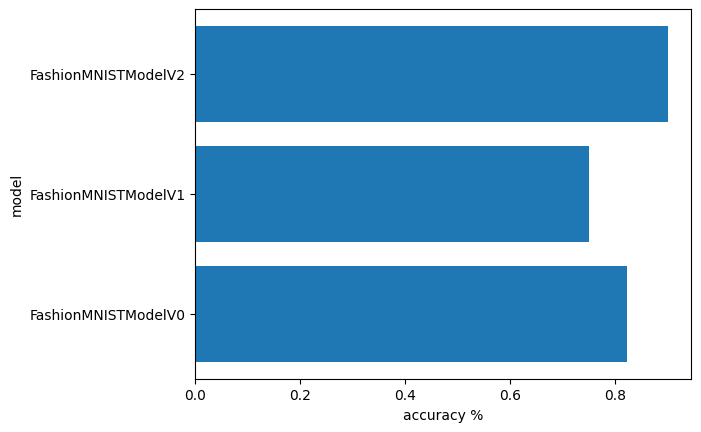

In [ ]:
plt.barh(compare_results.model_name,compare_results.model_acc)
plt.xlabel("accuracy %")
plt.ylabel("model");

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample data unsqueeze it to add a dimension so that it can be used after flatteing
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #forward pass
      pred_logits=model(sample)

      #get prediction probabilities between 0 and 1 for multiclass classification
      pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)

      #to plot in matplotlib we need it on the cpu
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)



In [ ]:
import random
#random.seed(42)

test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

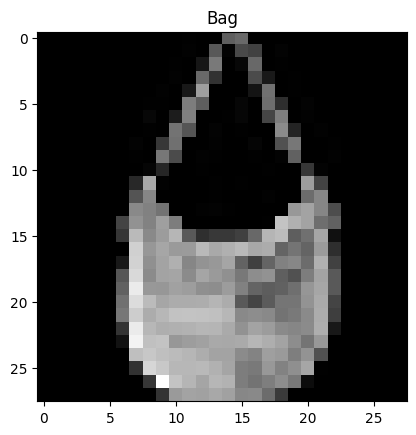

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_name[test_labels[0]])

# **Make Prediction**

In [ ]:
pred_probs=make_predictions(model=model_2,data=test_samples)

pred_probs[:2]

tensor([[5.3407e-06, 7.4532e-10, 3.3323e-06, 8.5705e-07, 1.3005e-04, 1.3402e-05,
         5.3693e-07, 2.5783e-08, 9.9985e-01, 2.8241e-10],
        [1.9463e-08, 7.5370e-12, 4.4338e-09, 1.3259e-08, 1.3808e-10, 3.4484e-08,
         8.0640e-10, 6.2395e-08, 1.0000e+00, 2.1027e-09]])

In [ ]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([8, 8, 9, 6, 7, 0, 7, 2, 7])

# **Plot the predictions**

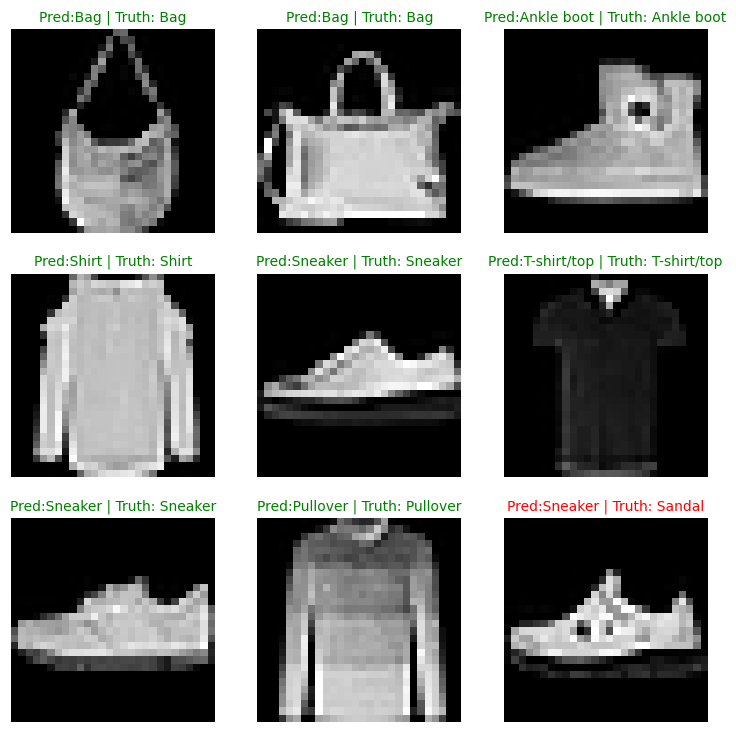

In [ ]:
plt.figure(figsize=(9,9))

for i, sample in enumerate(test_samples):
  plt.subplot(3,3,i+1)
  #plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")
  #print the predicted label
  pred_label=class_name[pred_classes[i]]
  # print the real label
  truth_label=class_name[test_labels[i]]
  # title for the plot
  title_texts= f"Pred:{pred_label} | Truth: {truth_label}"

  if pred_label==truth_label:
    plt.title(title_texts, fontsize=10, c="g")
  else:
    plt.title(title_texts, fontsize=10,c="r")
  plt.axis(False)




Make Prediction with trained model

In [ ]:
from tqdm.auto import  tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making Predictions..."):
    X,y=X.to(device),y.to(device)

    y_logit=model_2(X)

    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor


Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 7])

In [ ]:
len(y_pred_tensor)

10000

# **Confusion Matrix**
mlxtend.plotting.plot_confusion_matrix()

In [ ]:
!pip install --upgrade mlxtend


In [ ]:
import  mlxtend
import torchmetrics

In [ ]:
mlxtend.__version__

'0.23.4'

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
confusion_matrix=torchmetrics.ConfusionMatrix(num_classes=len(class_name),task="multiclass")
confusion_tensor=confusion_matrix(preds=y_pred_tensor,target=test_data.targets)
confusion_tensor

tensor([[681,   4,  33,  65,   9,   0, 206,   0,   2,   0],
        [ 16, 909,   3,  56,   8,   0,   6,   0,   2,   0],
        [ 13,   2, 797,  17, 109,   0,  59,   0,   3,   0],
        [ 26,  11,  13, 888,  21,   0,  36,   0,   3,   2],
        [ 15,   6, 100,  68, 717,   0,  89,   0,   5,   0],
        [ 13,   2,   5,  13,   1, 815,  12,  51,  65,  23],
        [ 90,   6, 104,  59,  92,   1, 643,   0,   5,   0],
        [  1,   2,   0,   0,   0,  22,   0, 929,  11,  35],
        [ 21,   7,  21,  20,  18,   6,  52,   7, 847,   1],
        [  1,   2,   2,   5,   0,  22,   7, 134,  16, 811]])

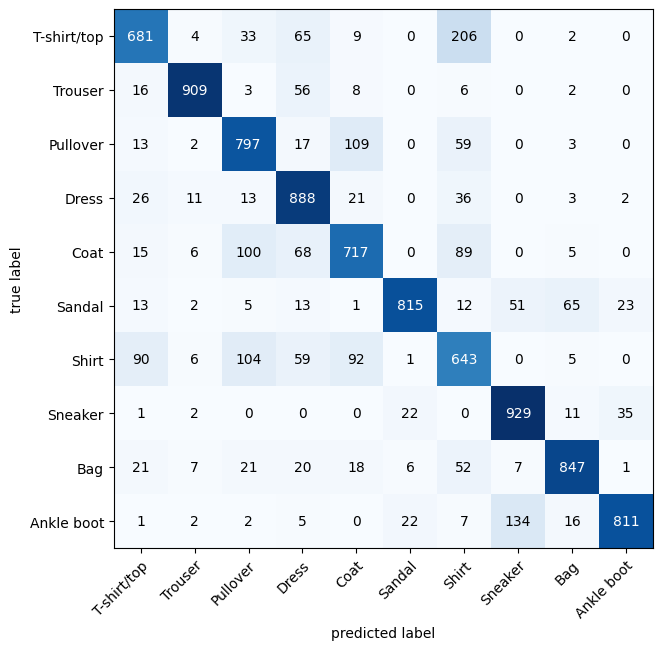

In [ ]:
# Plot confusion matrix

fig, ax= plot_confusion_matrix(conf_mat=confusion_tensor.numpy(),
                               class_names=class_name,
                               figsize=(10,7))

**Save Model**

In [ ]:
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
torch.save(obj=model_2.state_dict(),f=MODEL_NAME)

In [ ]:
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_name))

loaded_model_2.load_state_dict(torch.load(f=MODEL_NAME))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluating the model

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2916148006916046,
 'model_acc': 0.9007588028907776}

In [ ]:
eval_model(loaded_model_2,
           test_dataloader,
           loss_fn,
           acc_fn,
           device)

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2916148006916046,
 'model_acc': 0.9007588028907776}